# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Data normalizations and outliers
### VIDEO: Euclidean distance for outlier removal
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## create some data

N = 40
rng = np.random.default_rng()

# two-dimensional data, log-normal distr
d1 = np.exp(-np.abs(rng.standard_normal(size=N)*3))
d2 = np.exp(-np.abs(rng.standard_normal(size=N)*5))
datamean = [np.mean(d1), np.mean(d2)]

# compute distance of each point to the mean
ds = np.zeros(N)
for i in range(N):
    ds[i] = np.sqrt((d1[i]-datamean[0])**2 + (d2[i]-datamean[1])**2)
    
# convert to z (don't need the original data)
ds_z = (ds - np.mean(ds)) / np.std(ds)

Text(0, 0.5, 'Z distance')

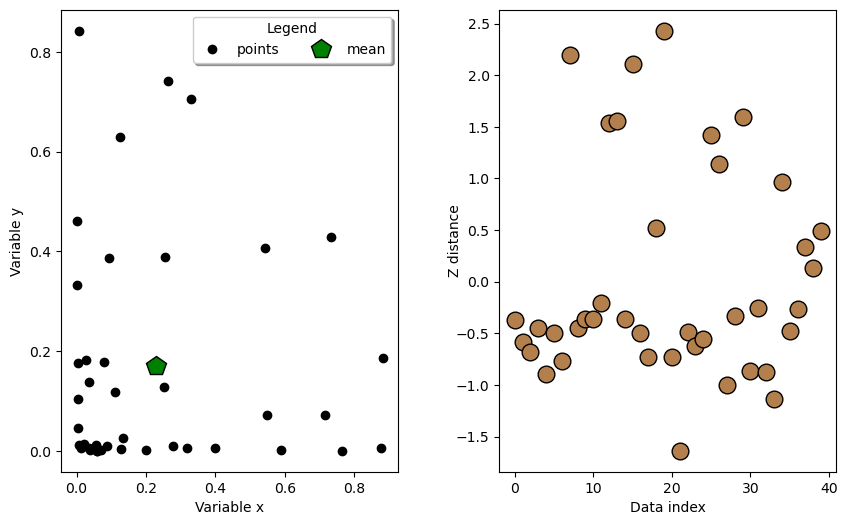

In [3]:
# plot the data
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=0.3)

ax[0].plot(d1, d2, 'ko', markerfacecolor='k', label='points')
#ax[0].set_xticks([])
#ax[0].set_yticks([])
ax[0].set_xlabel('Variable x')
ax[0].set_ylabel('Variable y')
# plot the multivariate mean
ax[0].plot(datamean[0], datamean[1], 'kp',markerfacecolor='g', markersize=15,
           label='mean')
ax[0].legend(loc='upper right', shadow=True, framealpha=1, title='Legend', ncol=2)

# then plot those distances
ax[1].plot(ds_z, 'ko', markerfacecolor=[0.7, 0.5, 0.3], markersize=12)
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance', labelpad=-4)

Offending points: [ 7 15 19]


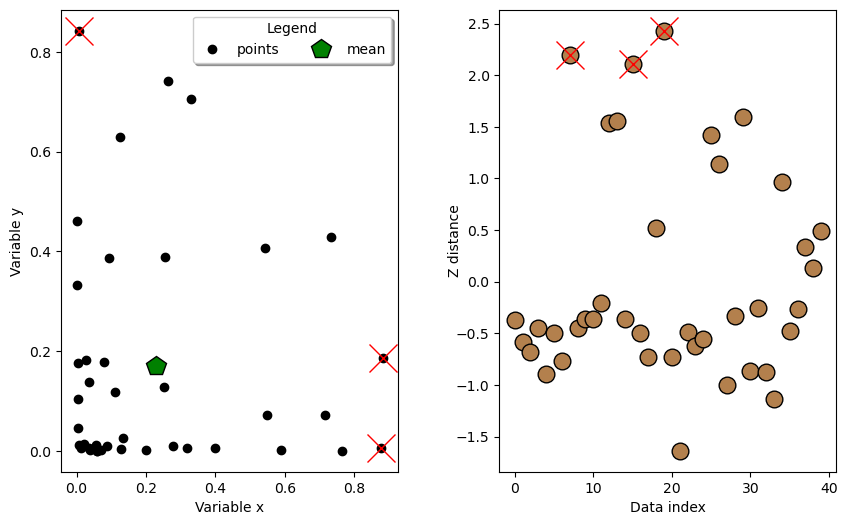

In [4]:
## now for the thresholding

# threshold in standard deviation units
distanceThresh = 2

# find the offending points (точнее, индексы этих аномалий)
oidx = np.nonzero(ds_z > distanceThresh)[0]
'''
Почему не берем модуль от ds? 

Потому что под аномальными значениями в данном случае подразумеваются 
относительно большие расстояния, которые при z-нормировании будут иметь знак плюс.
Небольшие расстояния при z-нормировке будут иметь знак минус - 
они меньше среднего значения расстояния для всей выборки.
'''
print(f"Offending points: {oidx}")

# and cross those out
ax[0].plot(d1[oidx], d2[oidx], 'x', color='r', markersize=20)
ax[1].plot(oidx, ds_z[oidx], 'x', color='r', markersize=20)
fig